# 1. Loading the fMRI images

Let's first learn how to load fMRI images, and also understand the dimensions of fMRI images.

In [1]:
#main library for preprocessing fMRI images
import nibabel as nb
print(nb.__version__)   

3.2.1


In [2]:
#other libraries
import numpy as np
import matplotlib.pyplot as plt

## Loading

Load some data.  Note that the data is from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/29352  which contains 30 subjects data.  10 for AD (Alzheimers) (denoted nothing), 10 for MCI (Mild Cognitive Impairement) (denoted 1), and 10 for NCS (Normal) (denoted 2).  

Each of the subject has two information - functional and structual.

Let's try load the eighth (i just simply randomly choose) AD subject images.

In [3]:
t1w  = nb.load('data/subj_08_structural.nii')  #t1w stands for T1 weighted image
bold = nb.load('data/subj_08_functional.nii')  #blood oxygenization image (the functional MRI)
t1w

## Data Structures

NiBabel represents fMRI as a structure containing three things:

1. The image **data** array: a 3D or 4D array of image data
   1. Structural - (x, y, slices)
   2. Functional - (x, y, slices, time)
2. An **affine** matrix: 4x4 array relating voxel coordinates and "world" (how the subject faces the fMRI) coordinates
3. Image **header**: usually a format-specific header

Many file types encode this basic structure. NiBabel will read any of ANALYZE (plain, SPM99, SPM2 and later), NIfTI-1, NIfTI-2, MINC 1.0, MINC 2.0, AFNI BRIK/HEAD, MGH, ECAT, DICOM and Philips PAR/REC, and expose a simple interface:

**Note**:  Often, we're not particularly interested in the header, or even the affine. But it's important to know they're there and, especially, to remember to copy them when making new images, so that derivatives stay aligned with the original image.   Here we shall briefly explore them.  To understand below, it may be wise to first read Matthew Brett's [Coordinate systems and affines](https://nipy.org/nibabel/coordinate_systems.html) tutorial which is an excellent resource.

Use `.header` to list the metadata

In [4]:
metadata = t1w.header
# print(metadata)

Use `.affine` to get the transformation matrix, transforming the scanner coordinates to voxel coordinates.  We just gonna print it out for now.

In [5]:
t1w.affine

array([[-5.60646653e-02, -7.04198703e-02,  9.95940685e-01,
        -7.50328369e+01],
       [-9.98336971e-01, -9.44955833e-03, -5.68677112e-02,
         1.24853638e+02],
       [-1.34158097e-02,  9.97472644e-01,  6.97729737e-02,
        -1.54804047e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

## Handling fMRI images

To do anything with the image, we shall retrieve its NumPy array by calling `get_fdata()`

In [6]:
data = t1w.get_fdata()
data.shape

(224, 256, 176)

Here, the data is basically `(x, y, slices)`.  For example, let's try to plot the brain image in slice 50

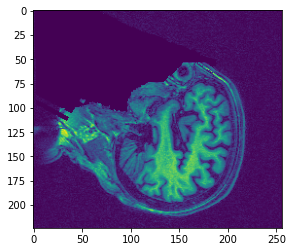

In [7]:
slice50 = data[:, :, 50]
plt.imshow(slice50)

We can also zoom in a bit by specifying some exact x and y.

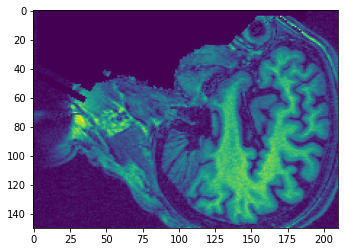

In [8]:
slice50_zoom = data[50:200, :210, 50]
plt.imshow(slice50_zoom)

We can also check the distribution of values in slice 50, by plotting the histogram.

As you can see below, many values are around 0 which represent voxels outside the brain (the dark area of the image.)

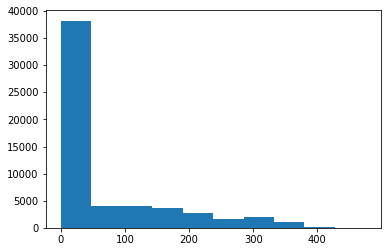

In [9]:
plt.hist(data[:, :, 50].ravel());

Here, we later may want to manipulate the fMRI image.  This gonna be a non-sense example, but is a simple example to show how you can transform your array (e.g., masking, normalizing) and then detect the change.  

Here, I will simply put a square at one location

<ipython-input-10-7e16879e11d3>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


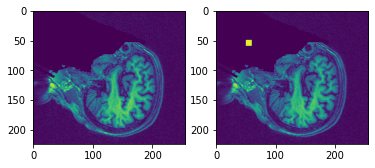

In [10]:
new_data = data.copy()
new_data[50:60, 50:60, 50] = 500

fig, axes = plt.subplots(ncols=2)

axes[0].imshow(data[:, :, 50])
axes[1].imshow(new_data[:, :, 50]) 

fig.show()

## Saving

After some transformations, you may want to save it using `to_filename()`

In [11]:
nb.Nifti1Image(new_data, affine=t1w.affine).to_filename('data/new_data.nii.gz')

## What we learn:

- Brain images are simply array of numbers, aranged in `x, y, slices`
- Nibabel is a nice library that can help us load the images in nifti format, which is one common format for working with fMRI images.
- How to load and save images